<a href="https://colab.research.google.com/github/sahar-mariam/level2-report/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Wine dataset from sklearn
from sklearn.datasets import load_wine
wine = load_wine()

In [8]:
# Convert the dataset to a Pandas DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Split the dataset into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Accuracy: 94.44%


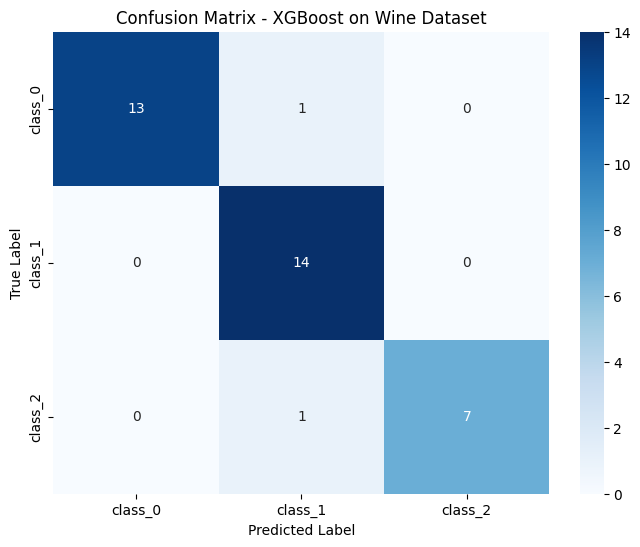

In [10]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix - XGBoost on Wine Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

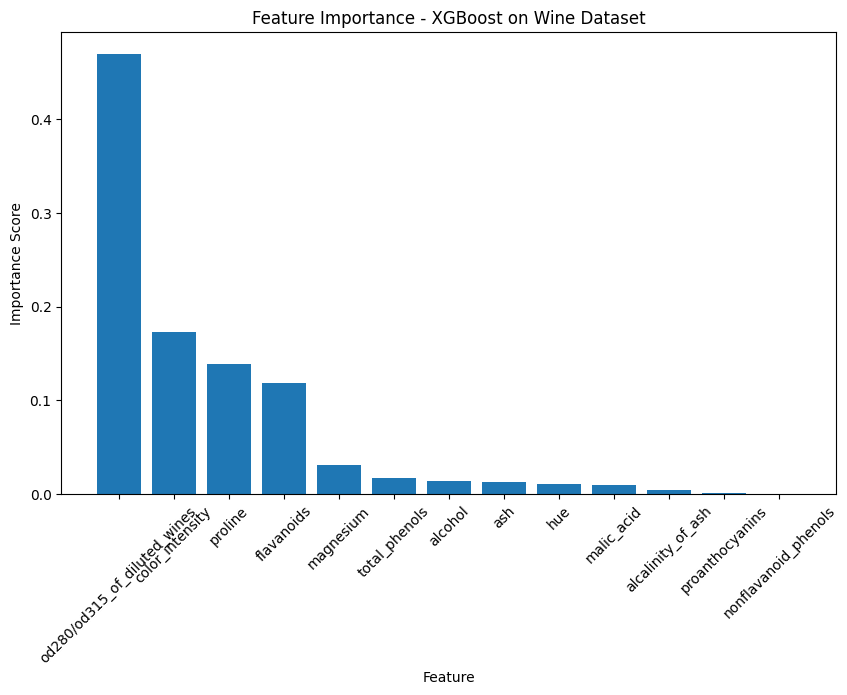

In [11]:

# Visualize feature importance using a bar plot
feature_importance = model.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance - XGBoost on Wine Dataset")
plt.show()